<a href="https://colab.research.google.com/github/himanshag/SECOM/blob/main/Secom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Packages

In [376]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import missingno as msno
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, matthews_corrcoef
from yellowbrick.classifier import ConfusionMatrix, ClassPredictionError
from sklearn.preprocessing import Normalizer
from sklearn.feature_selection import VarianceThreshold

import plotly as py
import plotly.express as px

# Importing Data

In [300]:
data_url="https://archive.ics.uci.edu/ml/machine-learning-databases/secom/secom.data"

In [301]:
label_url="https://archive.ics.uci.edu/ml/machine-learning-databases/secom/secom_labels.data"

In [302]:
secom_data = pd.read_csv(data_url,sep=' ',header=None)

In [303]:
secom_data.head()

,0,1,2,3,4,5,6,7,8,9,...,580,581,582,583,584,585,586,587,588,589
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,NaN,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,0.0044,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,NaN,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432


In [304]:
secom_labels = pd.read_csv(label_url, sep = " ",header=None)


In [305]:
secom_labels.head()

,0,1
0,-1,19/07/2008 11:55:00
1,-1,19/07/2008 12:32:00
2,1,19/07/2008 13:17:00
3,-1,19/07/2008 14:43:00
4,-1,19/07/2008 15:22:00


In [306]:
secom_data.columns = ["Feature_"+str(column+1) for column in range(len(secom_data.columns))]
secom_data.head()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,...,Feature_581,Feature_582,Feature_583,Feature_584,Feature_585,Feature_586,Feature_587,Feature_588,Feature_589,Feature_590
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,NaN,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,0.0044,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,NaN,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432


In [307]:
secom_labels.columns = ["Classification","Timestamp"]
#secom_labels.replace(-1, "Pass", inplace=True)
#secom_labels.replace(1, "Fail", inplace=True)
secom_labels.head()

,Classification,Timestamp
0,-1,19/07/2008 11:55:00
1,-1,19/07/2008 12:32:00
2,1,19/07/2008 13:17:00
3,-1,19/07/2008 14:43:00
4,-1,19/07/2008 15:22:00


In [308]:
secom_labels['Timestamp'] = pd.to_datetime(secom_labels['Timestamp'],errors='raise')
secom_labels['Classification'] = secom_labels["Classification"].astype("category")

# Merging Data

In [309]:
data= pd.concat([secom_labels,secom_data],axis=1)
data.head()

,Classification,Timestamp,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,...,Feature_581,Feature_582,Feature_583,Feature_584,Feature_585,Feature_586,Feature_587,Feature_588,Feature_589,Feature_590
0,-1,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,...,NaN,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN
1,-1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,...,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
2,1,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,...,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602
3,-1,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,...,0.0044,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432
4,-1,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,...,NaN,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432


# **Exploring Data**

## General Overview

In [310]:
data.head()

,Classification,Timestamp,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,...,Feature_581,Feature_582,Feature_583,Feature_584,Feature_585,Feature_586,Feature_587,Feature_588,Feature_589,Feature_590
0,-1,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,...,NaN,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN
1,-1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,...,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
2,1,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,...,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602
3,-1,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,...,0.0044,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432
4,-1,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,...,NaN,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432


In [311]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 592 entries, Classification to Feature_590
dtypes: category(1), datetime64[ns](1), float64(590)
memory usage: 7.1 MB


In [312]:
data.describe()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,...,Feature_581,Feature_582,Feature_583,Feature_584,Feature_585,Feature_586,Feature_587,Feature_588,Feature_589,Feature_590
count,1561.000000,1560.000000,1553.000000,1553.000000,1553.000000,1553.0,1553.000000,1558.000000,1565.000000,1565.000000,...,618.000000,618.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000
mean,3014.452896,2495.850231,2200.547318,1396.376627,4.197013,100.0,101.112908,0.121822,1.462862,-0.000841,...,0.005396,97.934373,0.500096,0.015318,0.003847,3.067826,0.021458,0.016475,0.005283,99.670066
std,73.621787,80.407705,29.513152,441.691640,56.355540,0.0,6.237214,0.008961,0.073897,0.015116,...,0.003116,87.520966,0.003404,0.017180,0.003720,3.578033,0.012358,0.008808,0.002867,93.891919
min,2743.240000,2158.750000,2060.660000,0.000000,0.681500,100.0,82.131100,0.000000,1.191000,-0.053400,...,0.001000,0.000000,0.477800,0.006000,0.001700,1.197500,-0.016900,0.003200,0.001000,0.000000
25%,2966.260000,2452.247500,2181.044400,1081.875800,1.017700,100.0,97.920000,0.121100,1.411200,-0.010800,...,0.003400,46.184900,0.497900,0.011600,0.003100,2.306500,0.013425,0.010600,0.003300,44.368600
50%,3011.490000,2499.405000,2201.066700,1285.214400,1.316800,100.0,101.512200,0.122400,1.461600,-0.001300,...,0.004700,72.288900,0.500200,0.013800,0.003600,2.757650,0.020500,0.014800,0.004600,71.900500
75%,3056.650000,2538.822500,2218.055500,1591.223500,1.525700,100.0,104.586700,0.123800,1.516900,0.008400,...,0.006475,116.539150,0.502375,0.016500,0.004100,3.295175,0.027600,0.020300,0.006400,114.749700
max,3356.350000,2846.440000,2315.266700,3715.041700,1114.536600,100.0,129.252200,0.128600,1.656400,0.074900,...,0.028600,737.304800,0.509800,0.476600,0.104500,99.303200,0.102800,0.079900,0.028600,737.304800


## Exploring class imbalance

In [313]:
data.Classification.value_counts()

-1    1463
1      104
Name: Classification, dtype: int64

Classification variable is not balanced. Before model building we need to understand this.

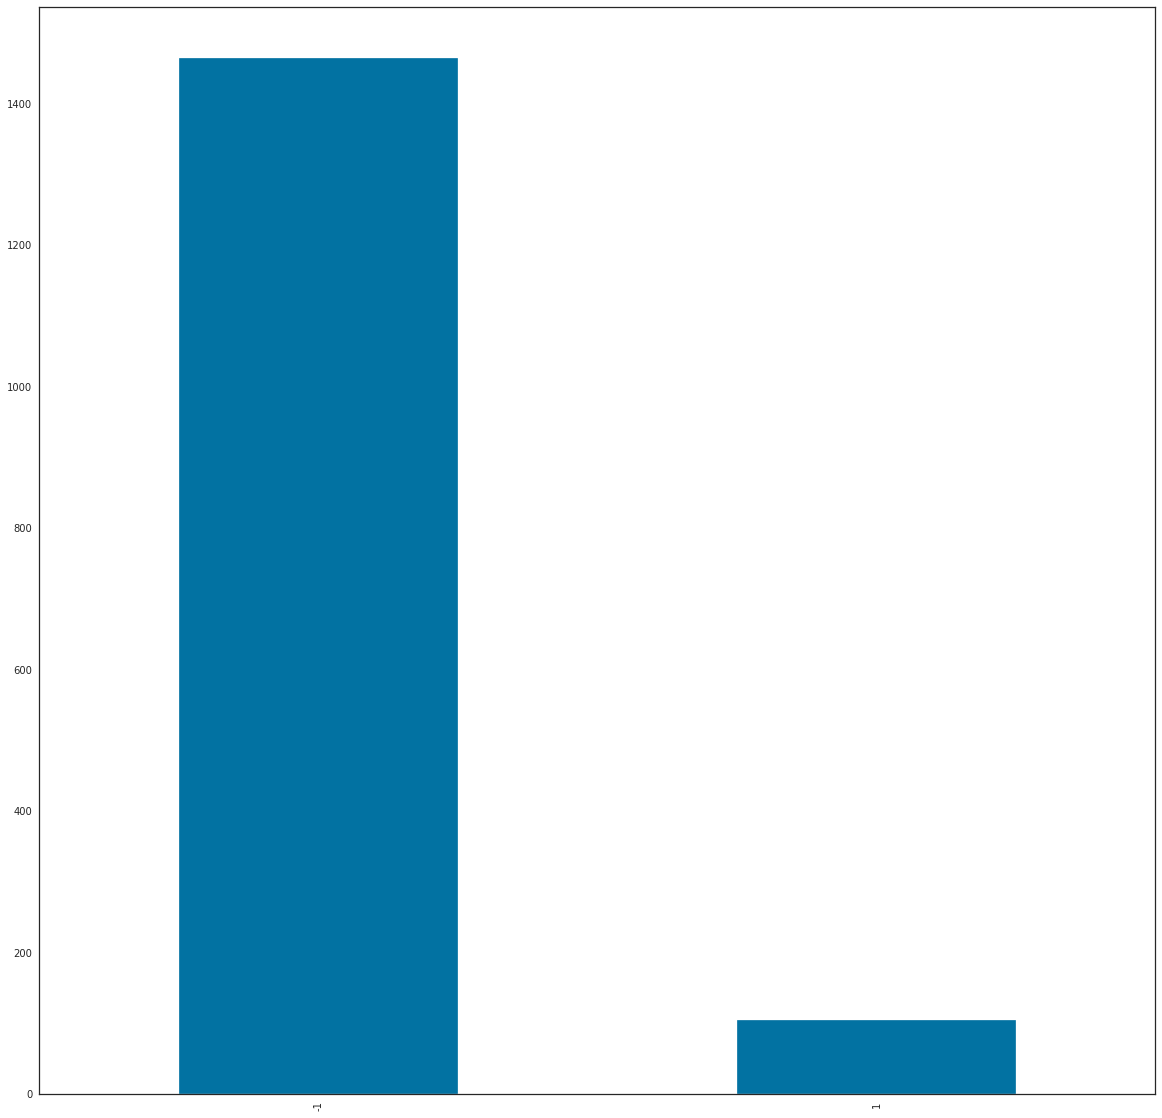

In [314]:
fig1 = plt.figure("Figure 1")
data.Classification.value_counts().plot(kind = 'bar')
plt.show()

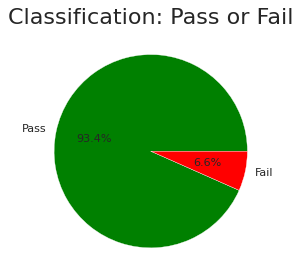

In [315]:
figure(figsize=(6, 4), dpi=80)
pie_data = data['Classification'].value_counts()
plt.pie(pie_data, labels=['Pass', 'Fail'], colors=['green', 'red'], autopct="%.1f%%")
plt.title('Classification: Pass or Fail', fontsize=20)
plt.show()

## Exploring Missing Values

In [316]:
data.isnull().sum()

Classification     0
Timestamp          0
Feature_1          6
Feature_2          7
Feature_3         14
                  ..
Feature_586        1
Feature_587        1
Feature_588        1
Feature_589        1
Feature_590        1
Length: 592, dtype: int64

In [317]:
data.isnull().sum().sum()

41951

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


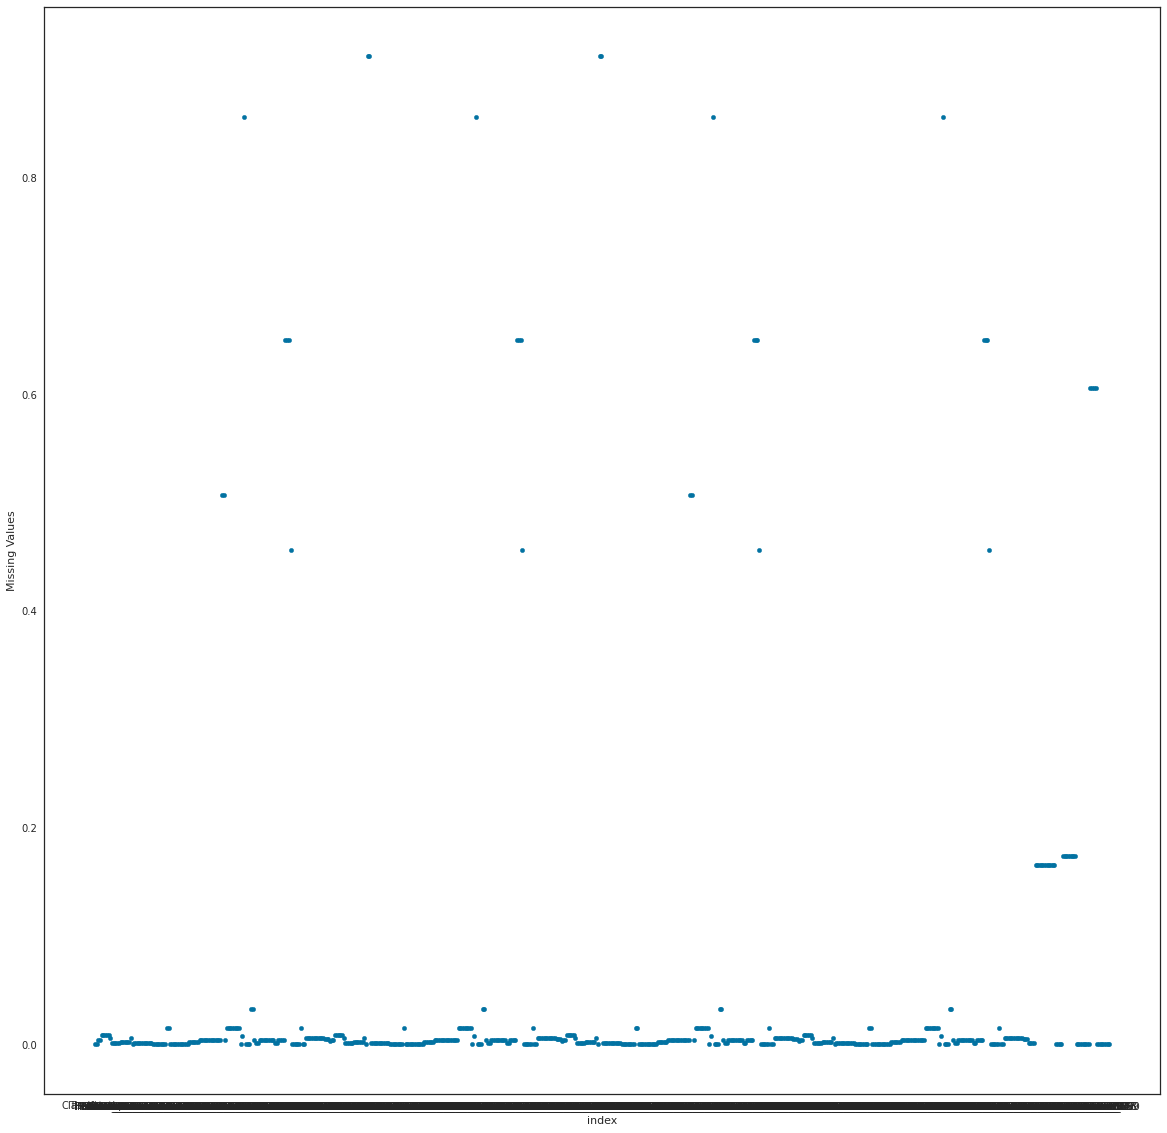

In [318]:
data.isna().mean().reset_index(name="Missing Values").plot.scatter(x='index', y="Missing Values")

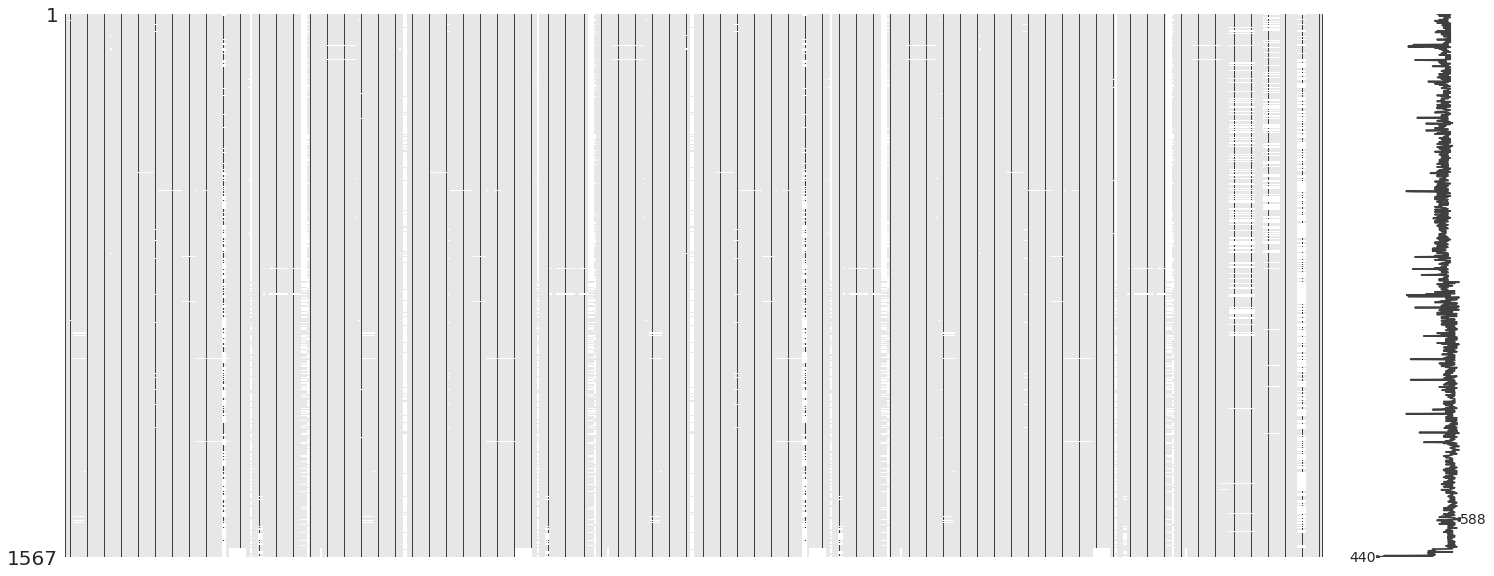

In [319]:
# Visualize missingness matrix
msno.matrix(data)
plt.show()

<function matplotlib.pyplot.show>

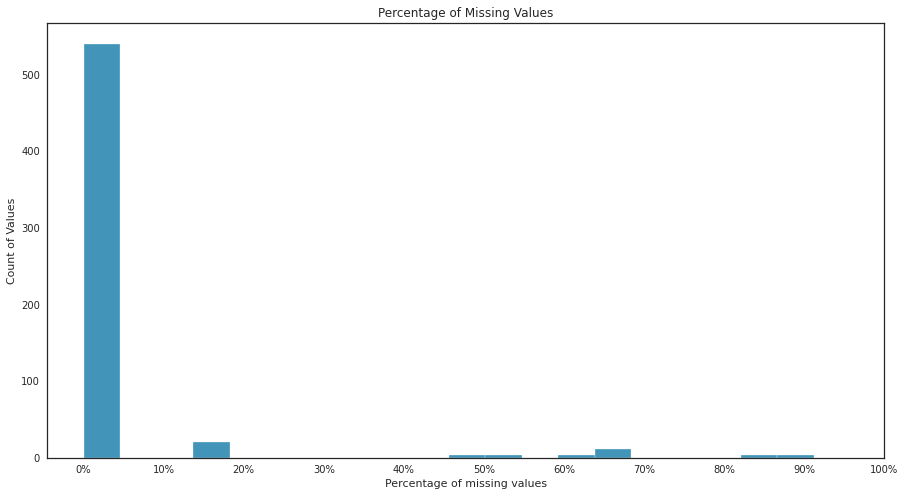

In [320]:
# Histogram of missing values
percent_missing = data.isnull().sum() * 100 / len(data)
missing_df = pd.DataFrame({'percent_missing': percent_missing})
missing = missing_df.sort_values(by=['percent_missing'],ascending=False)
sns.set_style("ticks")
plt.figure(figsize=(15,8))
h = sns.histplot(data=missing,x="percent_missing",bins=20)
h.set_xticks([0,10,20,30,40,50,60,70,80,90,100])
h.set_xticklabels(["0%","10%","20%","30%","40%","50%","60%","70%","80%","90%","100%"])
plt.xlabel('Percentage of missing values')
plt.ylabel('Count of Values')
plt.title('Percentage of Missing Values')
plt.show

In [321]:

missing55 = missing[missing["percent_missing"] >= 55]
missing55.describe()

,percent_missing
count,24.000000
mean,72.037864
std,12.029249
min,60.561583
25%,64.964901
50%,64.964901
75%,85.577537
max,91.193363


## Exploring data on the basis of dates

In [322]:
from datetime import datetime
data['year'] = pd.DatetimeIndex(data['Timestamp']).year
data['month'] = pd.DatetimeIndex(data['Timestamp']).month
data['date'] = pd.DatetimeIndex(data['Timestamp']).day
data['week_day'] = pd.DatetimeIndex(data['Timestamp']).weekday
data['start_time'] = pd.DatetimeIndex(data['Timestamp']).time
data['hour'] = pd.DatetimeIndex(data['Timestamp']).hour
data['min'] = pd.DatetimeIndex(data['Timestamp']).minute
data=data.drop('Timestamp',axis=1)

In [323]:
data.head()

,Classification,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,...,Feature_588,Feature_589,Feature_590,year,month,date,week_day,start_time,hour,min
0,-1,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,NaN,NaN,2008,7,19,5,11:55:00,11,55
1,-1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,0.0201,0.0060,208.2045,2008,7,19,5,12:32:00,12,32
2,1,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,0.0484,0.0148,82.8602,2008,7,19,5,13:17:00,13,17
3,-1,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,0.0149,0.0044,73.8432,2008,7,19,5,14:43:00,14,43
4,-1,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,0.0149,0.0044,73.8432,2008,7,19,5,15:22:00,15,22


In [324]:
data.year.unique()

array([2008])

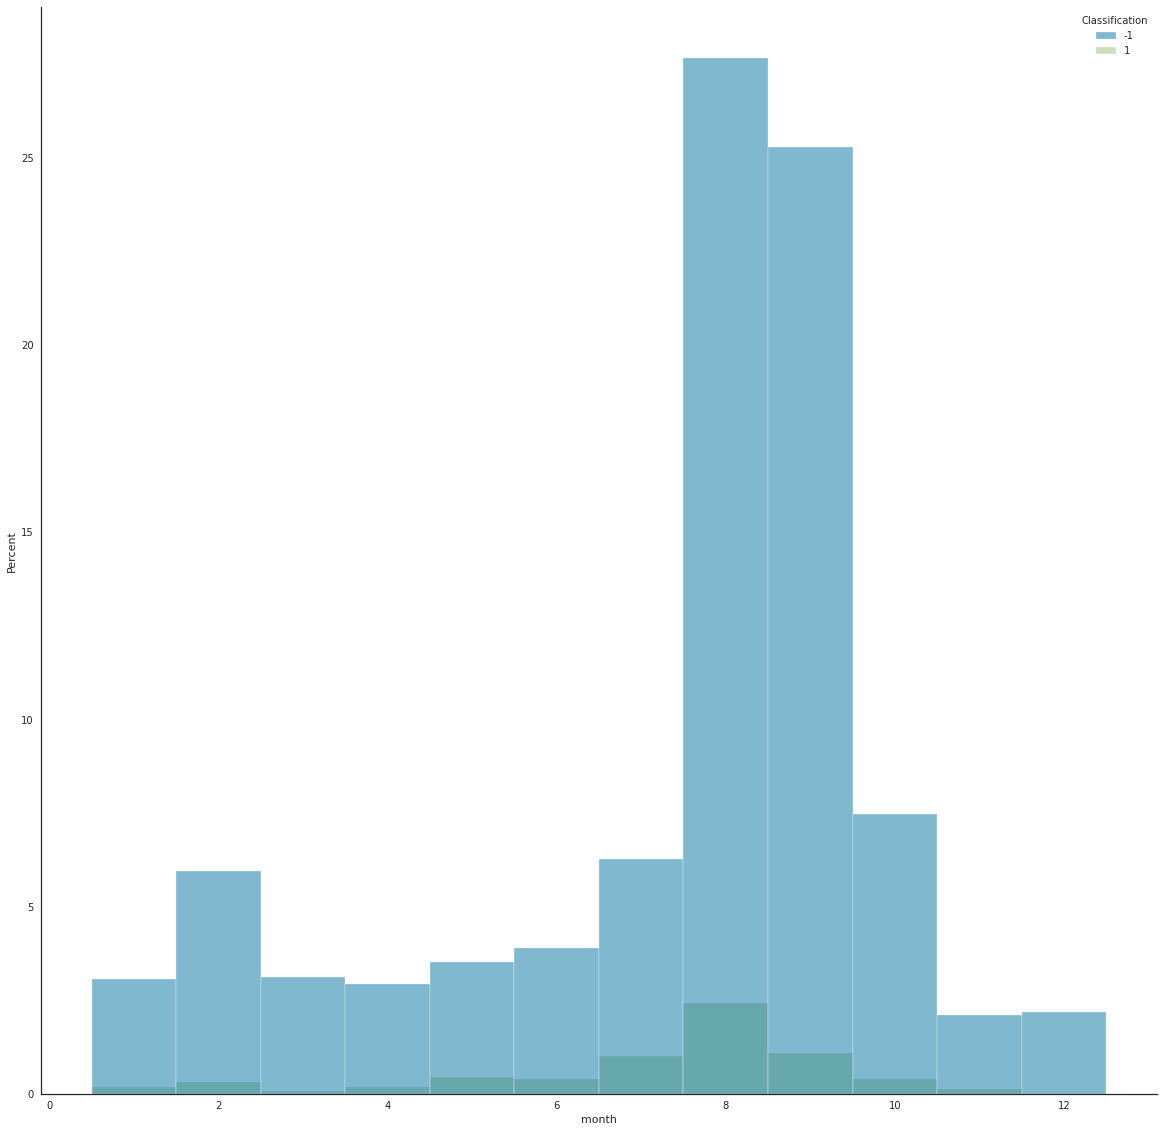

In [325]:
sns.histplot(data=data, x="month", hue="Classification",stat="percent", discrete=True,);
sns.despine(right=True,top=True)

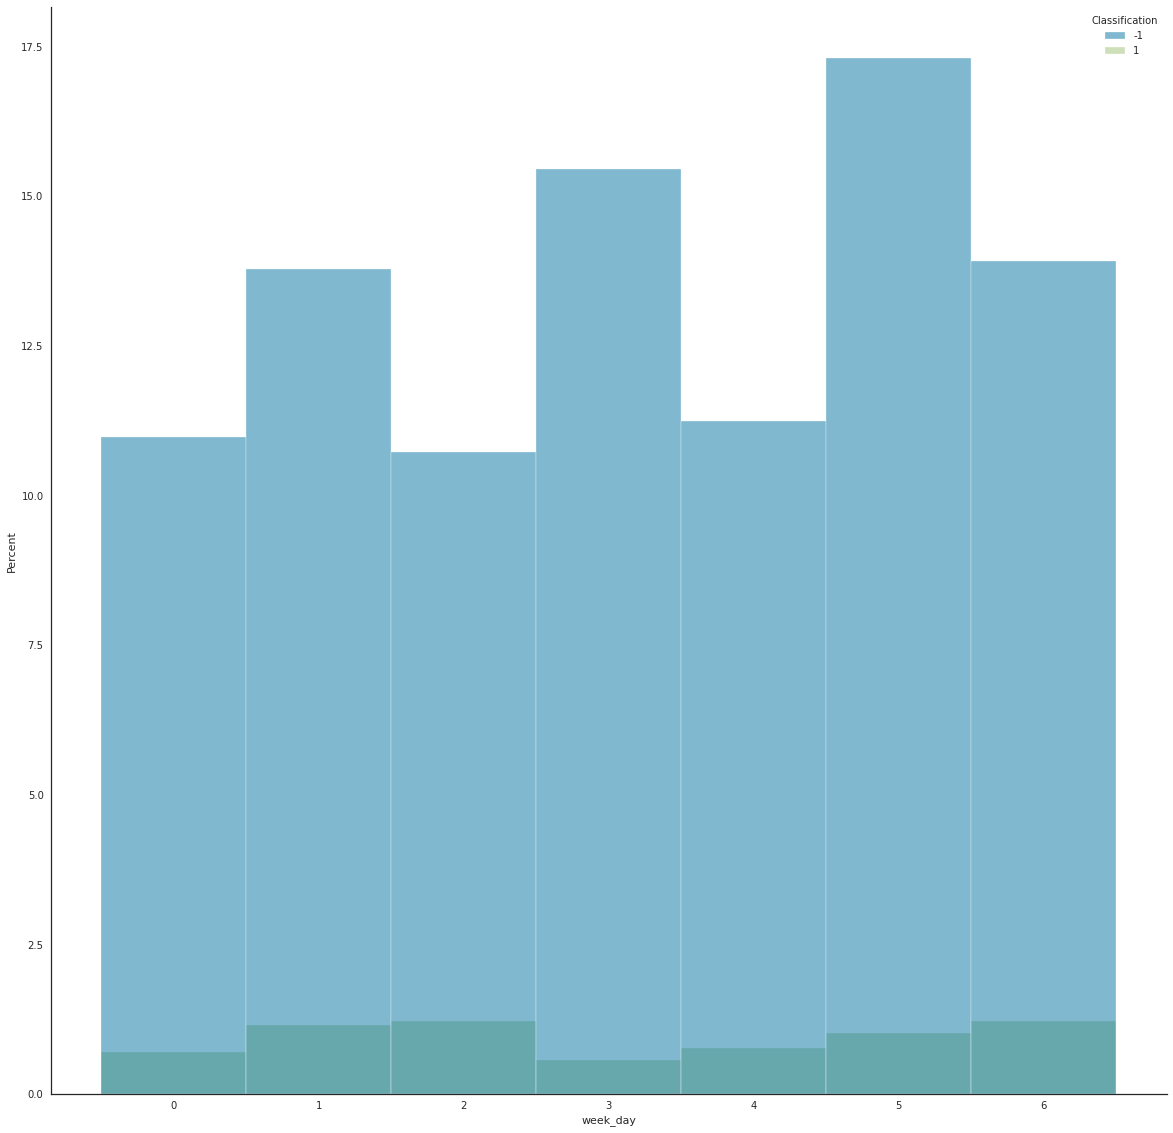

In [326]:
sns.histplot(data=data, x="week_day", hue="Classification",stat="percent", discrete=True,);
sns.despine(right=True,top=True)

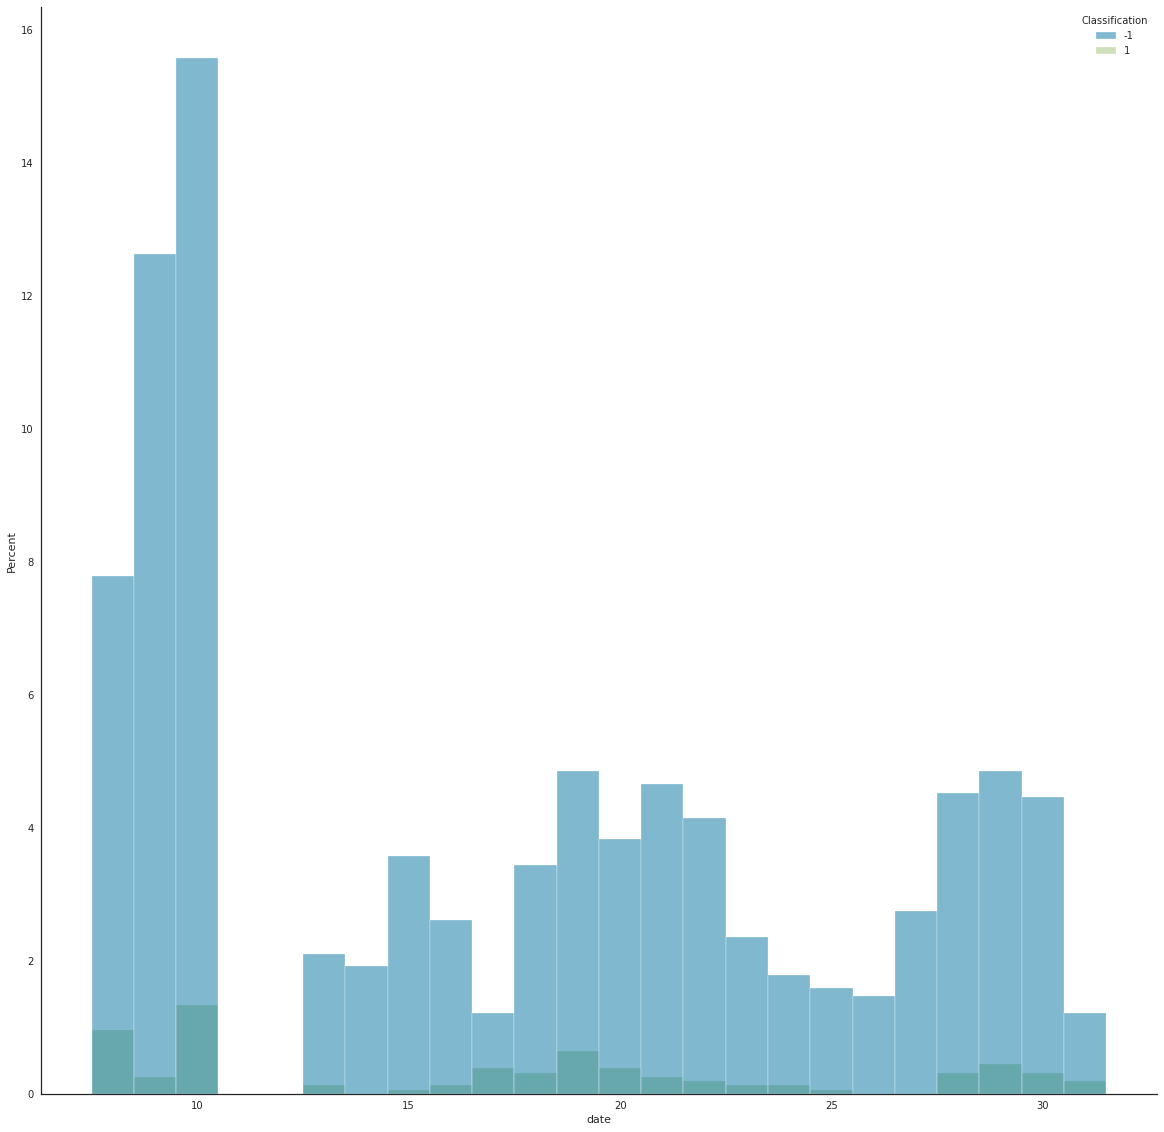

In [327]:
sns.histplot(data=data, x="date", hue="Classification",stat="percent", discrete=True,);
sns.despine(right=True,top=True)

In [328]:
data=data.drop(['year','month','date', 'week_day','start_time','hour','min'], 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



## Exploring Correlation

Text(0.5, 1.0, 'Heatmap for the Data')

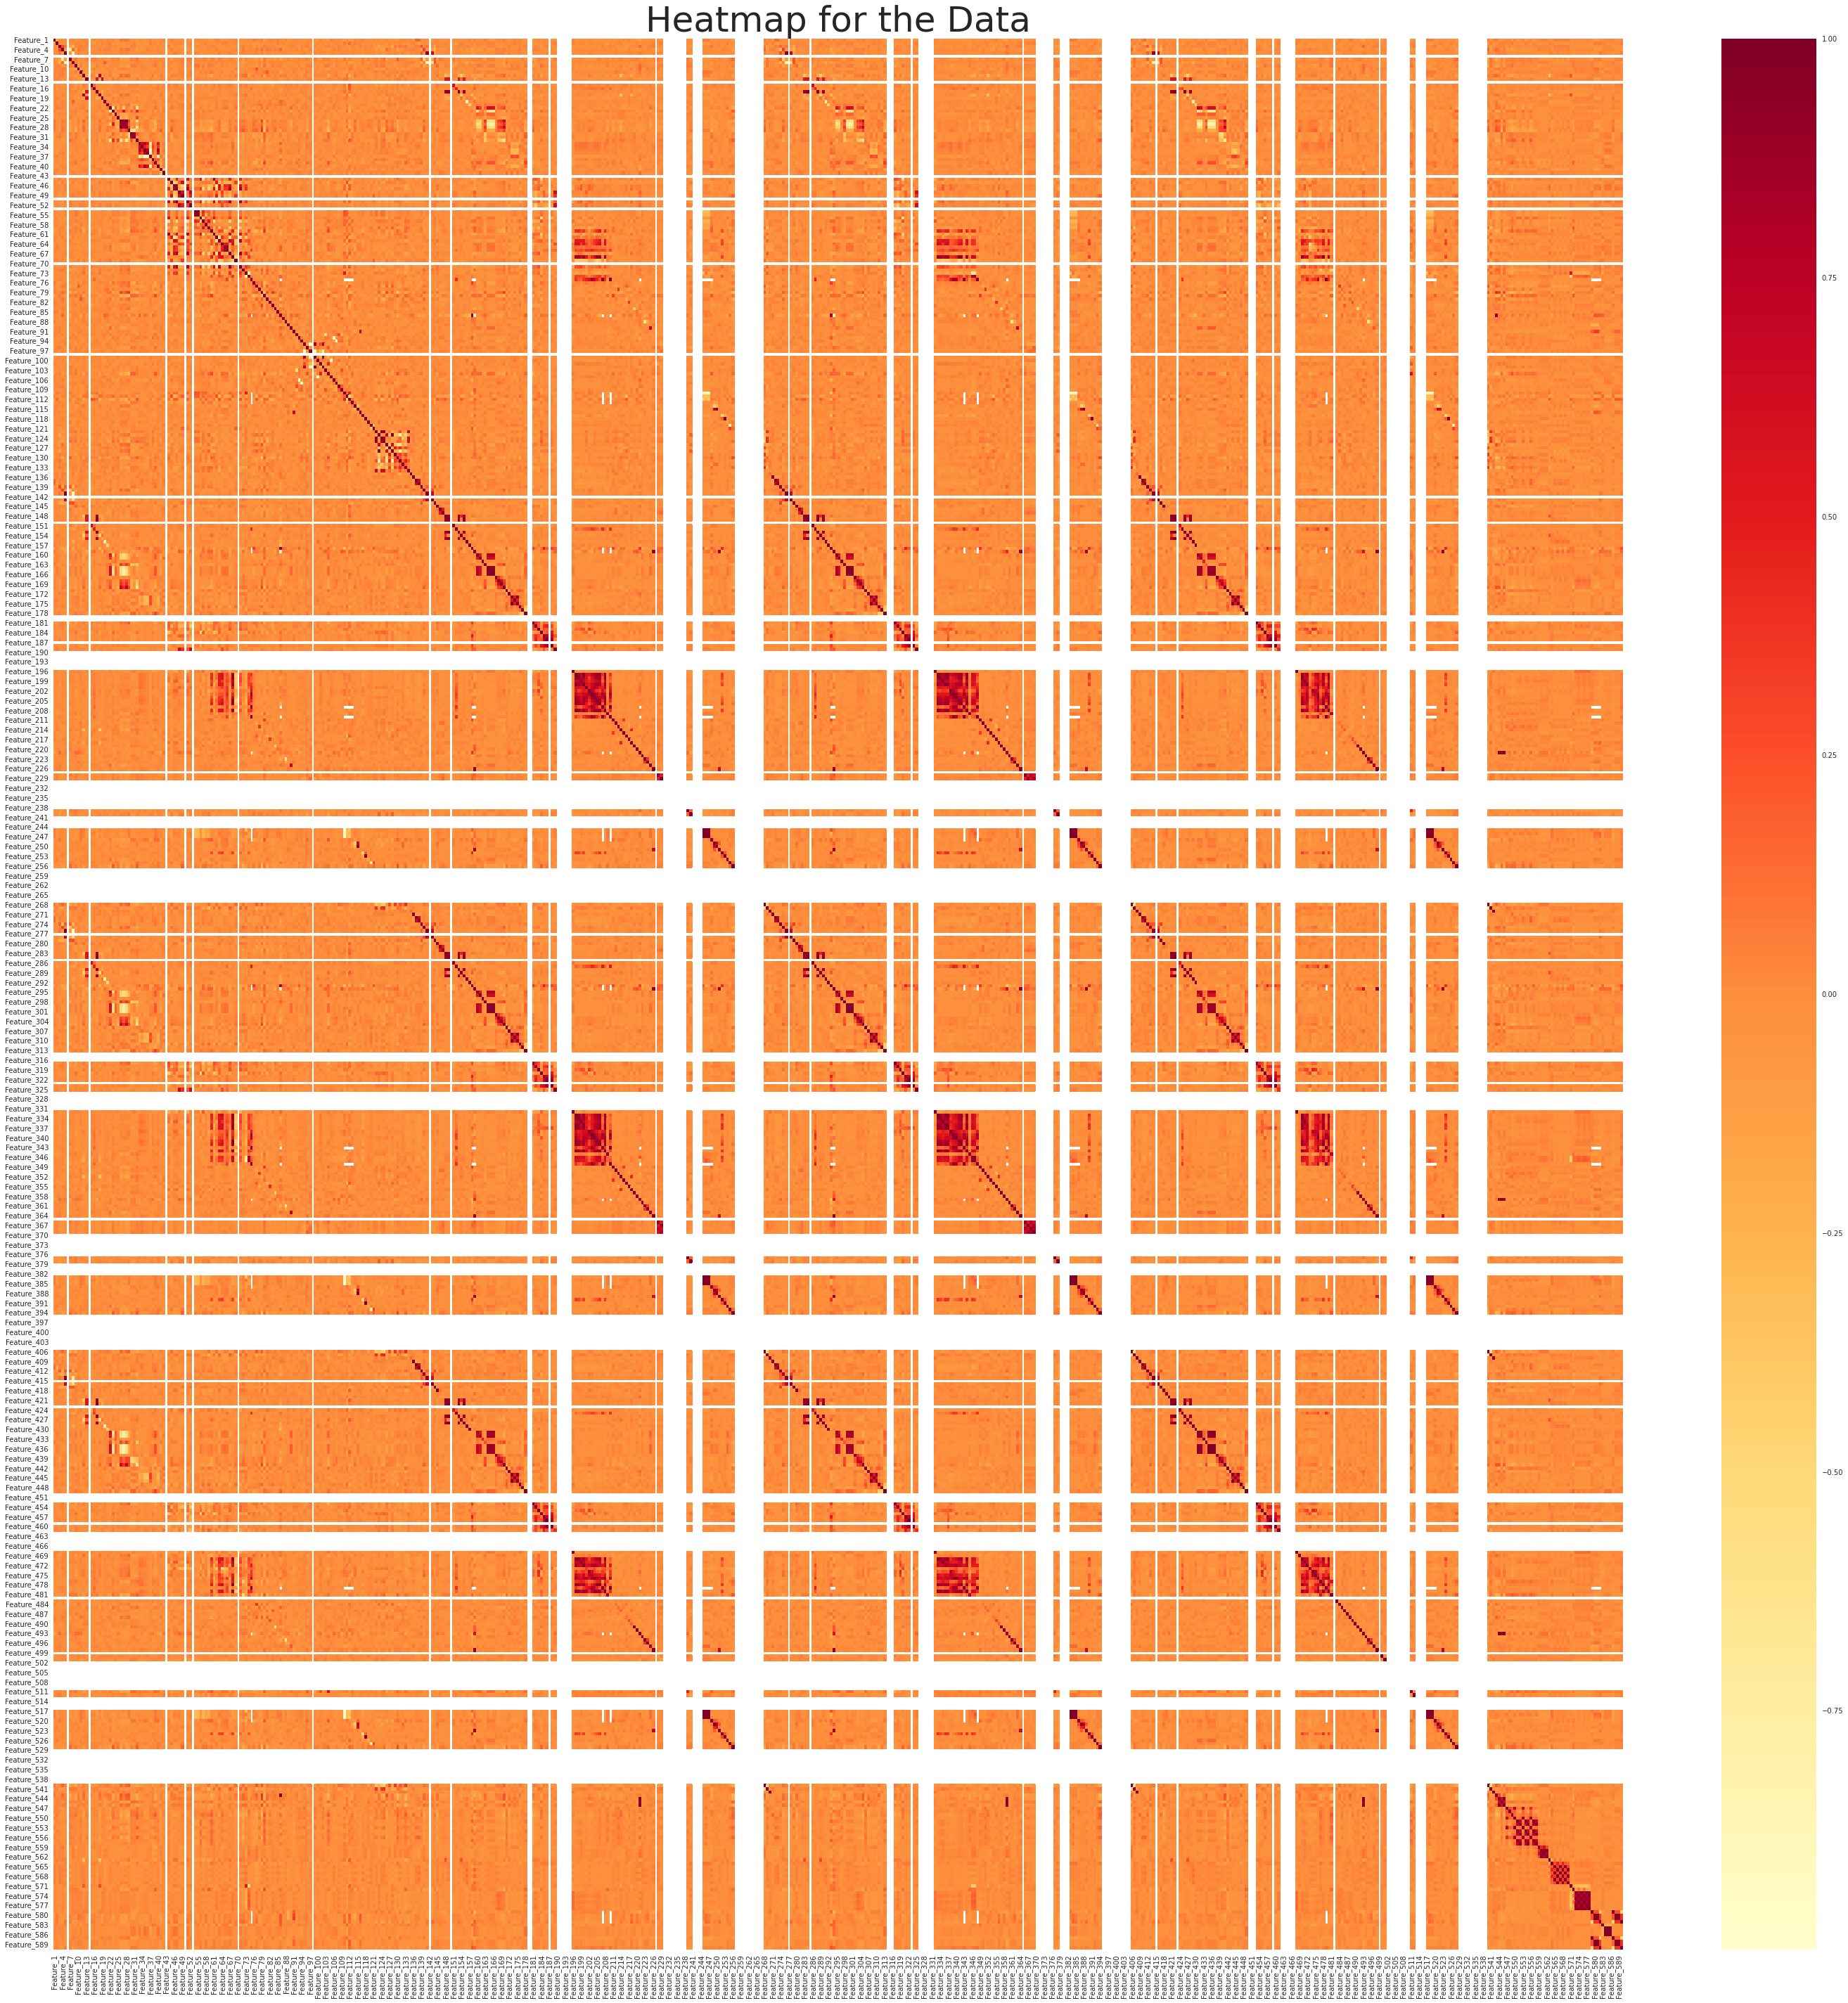

In [329]:
# Heatmap for correlation
plt.rcParams['figure.figsize'] = (50,50)
sns.heatmap(data.corr(),cmap="YlOrRd")
plt.title('Heatmap for the Data', fontsize = 50)

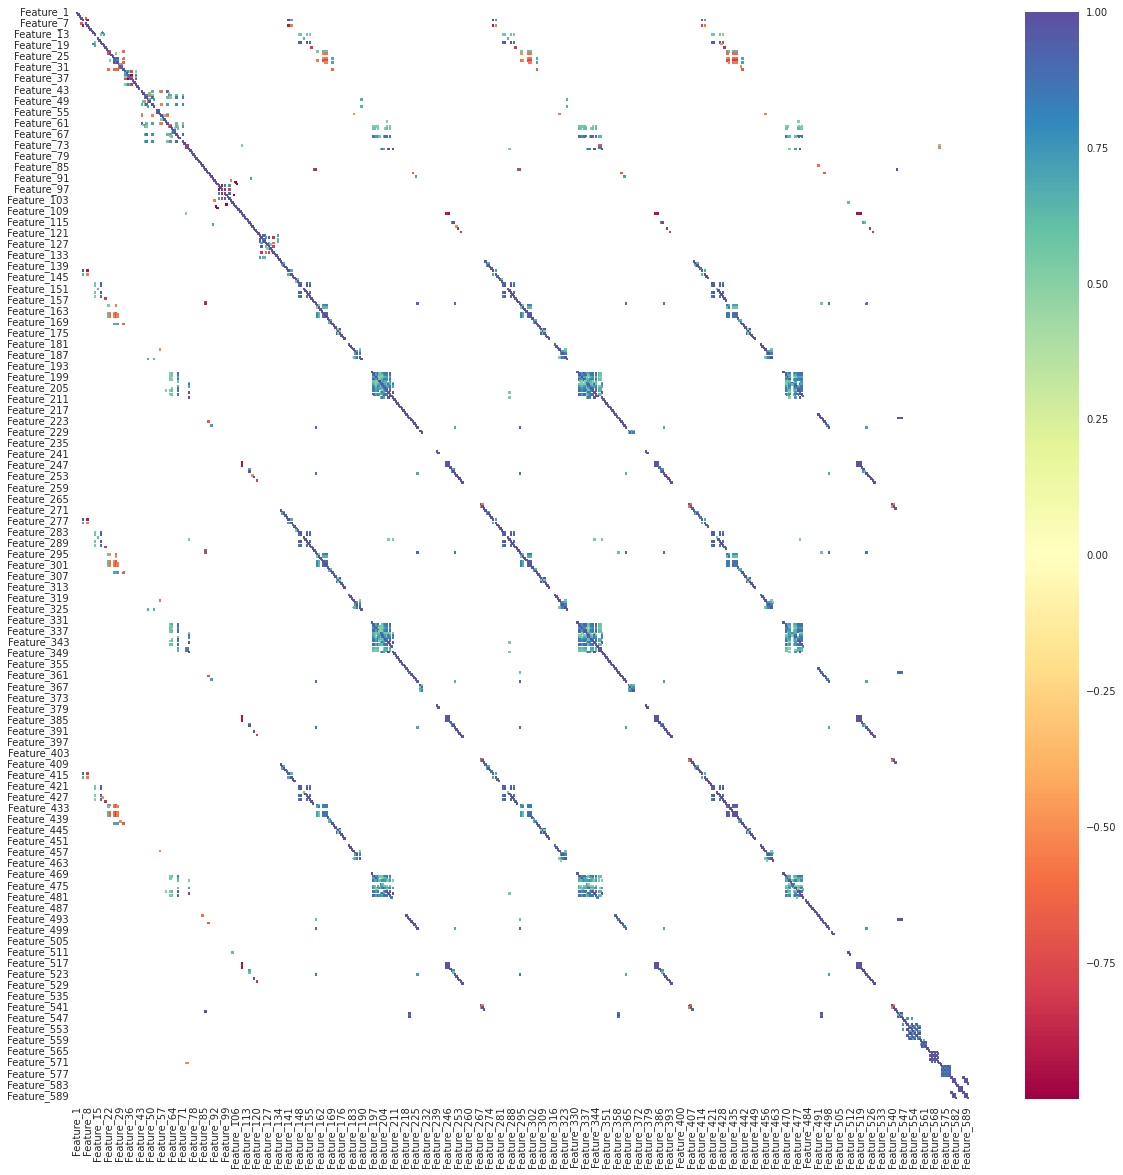

In [330]:
corrs = data.corr()
plt.rcParams['figure.figsize'] = [20, 20]
sns.heatmap(corrs[abs(corrs)>0.5], cmap="Spectral")

In [331]:
corr_matrix = secom_data.corr()
iters = range(len(corr_matrix.columns) - 1)
drop_cols = []
# Iterate through the correlation matrix and compare correlations
for i in iters:
    for j in range(i+1):
        item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
        col = item.columns
        row = item.index
        val = abs(item.values)

        # If correlation exceeds the threshold
        if val >= 0.90:
            # Print the correlated features and the correlation value
            print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
            drop_cols.append(col.values[0])

# Drop one of each pair of correlated columns
drops = set(drop_cols)
no_correlation = secom_data.drop(columns=drops)

Feature_8 | Feature_5 | 0.92
Feature_28 | Feature_26 | 0.98
Feature_37 | Feature_35 | 1.0
Feature_51 | Feature_47 | 0.9
Feature_55 | Feature_54 | 0.94
Feature_61 | Feature_44 | 0.9
Feature_71 | Feature_67 | 0.9
Feature_97 | Feature_95 | 0.96
Feature_102 | Feature_99 | 0.91
Feature_105 | Feature_100 | 0.99
Feature_106 | Feature_93 | 0.99
Feature_107 | Feature_94 | 0.99
Feature_124 | Feature_122 | 0.94
Feature_128 | Feature_123 | 0.96
Feature_141 | Feature_5 | 1.0
Feature_141 | Feature_8 | 0.92
Feature_149 | Feature_17 | 0.97
Feature_153 | Feature_17 | 0.98
Feature_153 | Feature_149 | 0.99
Feature_155 | Feature_149 | 0.94
Feature_158 | Feature_86 | 0.94
Feature_165 | Feature_164 | 0.92
Feature_166 | Feature_165 | 0.96
Feature_175 | Feature_173 | 1.0
Feature_200 | Feature_197 | 0.94
Feature_205 | Feature_68 | 0.9
Feature_207 | Feature_75 | 1.0
Feature_208 | Feature_197 | 0.92
Feature_210 | Feature_75 | 1.0
Feature_210 | Feature_207 | 1.0
Feature_226 | Feature_159 | 0.91
Feature_245 | Feat

In [332]:
no_correlation.head()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_9,Feature_10,Feature_11,...,Feature_566,Feature_571,Feature_572,Feature_573,Feature_574,Feature_579,Feature_580,Feature_582,Feature_583,Feature_584
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,1.5005,0.0162,-0.0034,...,NaN,533.8500,2.1113,8.95,0.3157,NaN,NaN,NaN,0.5005,0.0118
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,1.4966,-0.0005,-0.0148,...,NaN,535.0164,2.4335,5.92,0.2653,0.0096,0.0201,208.2045,0.5019,0.0223
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,1.4436,0.0041,0.0013,...,0.6219,535.0245,2.0293,11.21,0.1882,0.0584,0.0484,82.8602,0.4958,0.0157
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,1.4882,-0.0124,-0.0033,...,0.1630,530.5682,2.0253,9.33,0.1738,0.0202,0.0149,73.8432,0.4990,0.0103
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,1.5031,-0.0031,-0.0072,...,NaN,532.0155,2.0275,8.83,0.2224,NaN,NaN,NaN,0.4800,0.4766


## Exploring duplicated values

In [333]:
## Storing features with Duplicated Values 
dupval = []
for col in data.columns:
    if(data[col].unique().size <= 5):
        if(len(dupval) == 0):
            dupval =  data[col]
        else:
            dupval = pd.concat([dupval, data[col]], axis=1)
            #to drop the 123 columns
            #data.drop(col, axis=1, inplace=True)
dupval.pop("Classification")
dupval.head()

,Feature_6,Feature_14,Feature_43,Feature_50,Feature_53,Feature_70,Feature_75,Feature_98,Feature_142,Feature_150,...,Feature_530,Feature_531,Feature_532,Feature_533,Feature_534,Feature_535,Feature_536,Feature_537,Feature_538,Feature_539
0,100.0,0.0,70.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,100.0,0.0,70.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100.0,0.0,70.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100.0,0.0,70.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,100.0,0.0,70.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [334]:
dupval_v = dupval.describe().T
dupval_v.head()

,count,mean,std,min,25%,50%,75%,max
Feature_6,1553.0,100.0,0.0,100.0,100.0,100.0,100.0,100.0
Feature_14,1564.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Feature_43,1566.0,70.0,0.0,70.0,70.0,70.0,70.0,70.0
Feature_50,1566.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
Feature_53,1566.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


The maximum Standard Deviation among the features is 5.0620746355255335
The minimum Standard Deviation among the features is 0.0


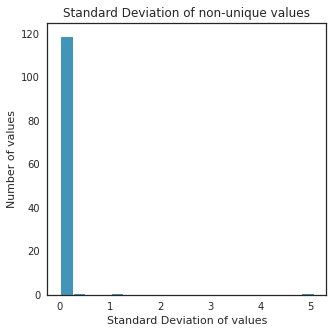

In [335]:
plt.figure(figsize=(5,5))
sns.histplot(data=dupval_v, x='std',bins=20,linewidth=1)
plt.xlabel('Standard Deviation of values')
plt.ylabel('Number of values')
plt.title('Standard Deviation of non-unique values')
print("The maximum Standard Deviation among the features is " + str(dupval_v["std"].max()))
print("The minimum Standard Deviation among the features is " + str(dupval_v["std"].min()))

In [336]:
colstodrop = dupval.columns[dupval.std()==0]
print("Columns with one unique values")
print(colstodrop)

Columns with one unique values
Index(['Feature_6', 'Feature_14', 'Feature_43', 'Feature_50', 'Feature_53',
       'Feature_70', 'Feature_98', 'Feature_142', 'Feature_150', 'Feature_179',
       ...
       'Feature_530', 'Feature_531', 'Feature_532', 'Feature_533',
       'Feature_534', 'Feature_535', 'Feature_536', 'Feature_537',
       'Feature_538', 'Feature_539'],
      dtype='object', length=116)


## Exploring Duplicated rows and columns

In [337]:
duplicated_rows = data.duplicated()
print(data[duplicated_rows])

Empty DataFrame
Columns: [Classification, Feature_1, Feature_2, Feature_3, Feature_4, Feature_5, Feature_6, Feature_7, Feature_8, Feature_9, Feature_10, Feature_11, Feature_12, Feature_13, Feature_14, Feature_15, Feature_16, Feature_17, Feature_18, Feature_19, Feature_20, Feature_21, Feature_22, Feature_23, Feature_24, Feature_25, Feature_26, Feature_27, Feature_28, Feature_29, Feature_30, Feature_31, Feature_32, Feature_33, Feature_34, Feature_35, Feature_36, Feature_37, Feature_38, Feature_39, Feature_40, Feature_41, Feature_42, Feature_43, Feature_44, Feature_45, Feature_46, Feature_47, Feature_48, Feature_49, Feature_50, Feature_51, Feature_52, Feature_53, Feature_54, Feature_55, Feature_56, Feature_57, Feature_58, Feature_59, Feature_60, Feature_61, Feature_62, Feature_63, Feature_64, Feature_65, Feature_66, Feature_67, Feature_68, Feature_69, Feature_70, Feature_71, Feature_72, Feature_73, Feature_74, Feature_75, Feature_76, Feature_77, Feature_78, Feature_79, Feature_80, Feature

In [338]:
duplicated_columns = data.columns.duplicated()
duplicatecolumn = [item for item in duplicated_columns if item == True]
print(duplicatecolumn)

[]


## Exploring Volatility

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



<function matplotlib.pyplot.show>

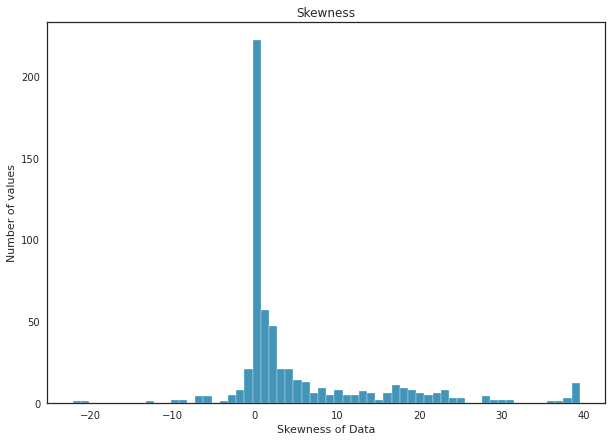

In [339]:
skewness = pd.DataFrame(data.skew())
skewness.columns = ["Skewness"]
sns.set_style("ticks")
plt.figure(figsize=(10,7))
sns.histplot(data=skewness,x="Skewness",bins=62)
plt.xlabel('Skewness of Data')
plt.ylabel('Number of values')
plt.title('Skewness')
plt.show

In [340]:
secom_v = secom_data.describe().T
secom_v

,count,mean,std,min,25%,50%,75%,max
Feature_1,1561.0,3014.452896,73.621787,2743.2400,2966.260000,3011.49000,3056.650000,3356.3500
Feature_2,1560.0,2495.850231,80.407705,2158.7500,2452.247500,2499.40500,2538.822500,2846.4400
Feature_3,1553.0,2200.547318,29.513152,2060.6600,2181.044400,2201.06670,2218.055500,2315.2667
Feature_4,1553.0,1396.376627,441.691640,0.0000,1081.875800,1285.21440,1591.223500,3715.0417
Feature_5,1553.0,4.197013,56.355540,0.6815,1.017700,1.31680,1.525700,1114.5366
...,...,...,...,...,...,...,...,...
Feature_586,1566.0,3.067826,3.578033,1.1975,2.306500,2.75765,3.295175,99.3032
Feature_587,1566.0,0.021458,0.012358,-0.0169,0.013425,0.02050,0.027600,0.1028
Feature_588,1566.0,0.016475,0.008808,0.0032,0.010600,0.01480,0.020300,0.0799
Feature_589,1566.0,0.005283,0.002867,0.0010,0.003300,0.00460,0.006400,0.0286


The maximum Standard Deviation among the features is 6553.569317232147
The minimum Standard Deviation among the features is 0.0


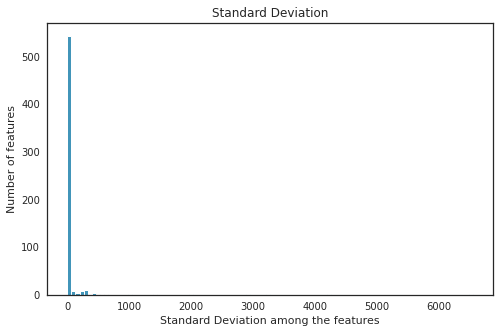

In [341]:
plt.figure(figsize=(8,5))
sns.histplot(data=secom_v, x='std',bins=100,linewidth=1)
plt.xlabel('Standard Deviation among the features')
plt.ylabel('Number of features')
plt.title('Standard Deviation')
print("The maximum Standard Deviation among the features is " + str(secom_v["std"].max()))
print("The minimum Standard Deviation among the features is " + str(secom_v["std"].min()))

## Exploring the spread of the data

The maximum average among the features is 8827.536865303417
The minimum average among the features is -5618.393610223642


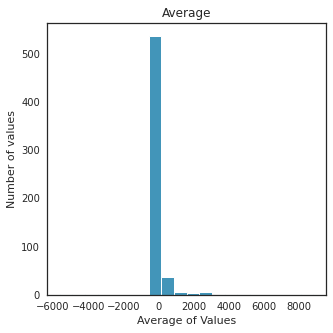

In [342]:
plt.figure(figsize=(5,5))
sns.histplot(data=secom_v, x='mean',bins=20,linewidth=1)
plt.xlabel('Average of Values')
plt.ylabel('Number of values')
plt.title('Average')
print("The maximum average among the features is " + str(secom_v["mean"].max()))
print("The minimum average among the features is " + str(secom_v["mean"].min()))

The maximum median among the features is 8825.435099999999
The minimum median among the features is -5523.25


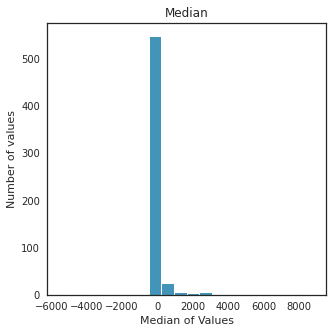

In [343]:
plt.figure(figsize=(5,5))
sns.histplot(data=secom_v, x='50%',bins=20,linewidth=1)
plt.xlabel('Median of Values')
plt.ylabel('Number of values')
plt.title('Median')
print("The maximum median among the features is " + str(secom_v["50%"].max()))
print("The minimum median among the features is " + str(secom_v["50%"].min()))

## Exploring Outliers and Influential Values

In [382]:
outliers = {}
for col in secom_data.columns:
    outliers_3s = secom_data[(np.abs(stats.zscore(secom_data[col])) > 3)]
    outliers_2s = secom_data[(np.abs(stats.zscore(secom_data[col])) > 2)]
    percentage_3s = len(outliers_3s)*100/len(secom_data)
    percentage_2s = (len(outliers_2s)-len(outliers_3s))*100/len(secom_data)
    list = []
    list.append(percentage_3s)
    list.append(percentage_2s)
    outliers[col] = list
outlier_df = pd.DataFrame.from_dict(outliers,orient="index")
outlier_df.columns = ["Outliers", "Influential Values"]

In [408]:
outlier_df.describe()

,Outliers,Influential Values
count,590.000000,590.000000
mean,0.077986,0.097455
std,0.434002,0.618682
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,4.467135,10.465858


In [409]:
outliers = outlier_df.loc[outlier_df["Outliers"]>0]
outliers.describe()

,Outliers,Influential Values
count,52.000000,52.000000
mean,0.884836,1.105739
std,1.203089,1.812135
min,0.063816,0.000000
25%,0.319081,0.063816
50%,0.446713,0.510530
75%,0.654116,1.419911
max,4.467135,10.465858


In [411]:
influencers = outlier_df.loc[outlier_df["Influential Values"]>0]
influencers.describe()

,Outliers,Influential Values
count,41.000000,41.000000
mean,1.024172,1.402400
std,1.312269,1.939188
min,0.063816,0.063816
25%,0.382897,0.191449
50%,0.446713,0.574346
75%,0.957243,1.914486
max,4.467135,10.465858


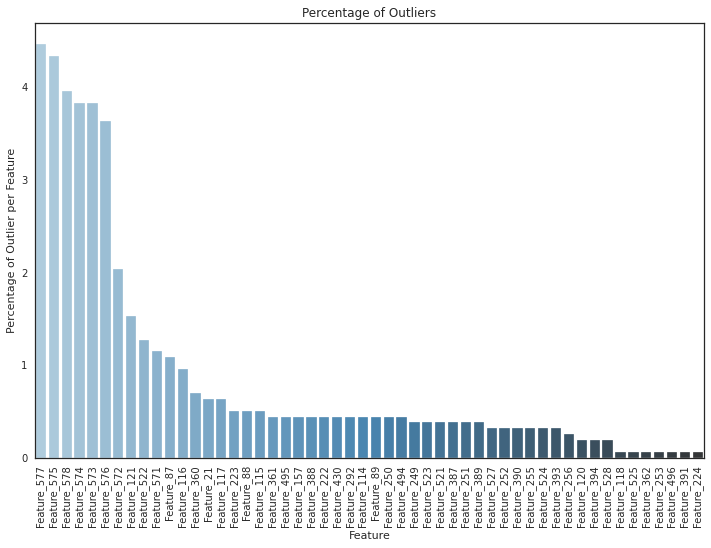

In [406]:
plt.figure(figsize=(12,8))
ax = sns.barplot(x=outliers.index, y="Outliers", data=outliers, order=outliers.
                 sort_values('Outliers',ascending=False).index,palette="Blues_d")
plt.title('Percentage of Outliers')
plt.xlabel('Feature')
plt.ylabel('Percentage of Outlier per Feature')
ax.tick_params(axis='x', labelrotation = 90)


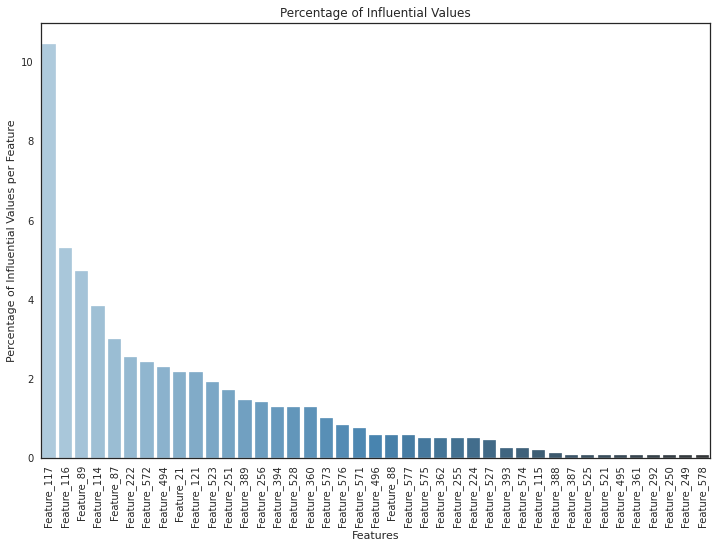

In [407]:
plt.figure(figsize=(12,8))
ax = sns.barplot(x=influencers.index, y="Influential Values", data=influencers, order=influencers.
                 sort_values('Influential Values',ascending=False).index,palette="Blues_d")
plt.title('Percentage of Influential Values')
plt.xlabel('Features')
plt.ylabel('Percentage of Influential Values per Feature')
ax.tick_params(axis='x', labelrotation = 90)

# Modelling Dataset into training and testing sets



In [344]:
df_target = data[['Classification']]
df_data = data.drop(['Classification'], axis=1)

In [345]:
X_train, X_test, y_train, y_test = train_test_split(df_data, df_target, test_size=0.2, random_state=42, stratify=df_target)

In [346]:
X_train = pd.DataFrame(X_train, columns=df_data.columns)
X_test = pd.DataFrame(X_test, columns=df_data.columns)
y_train = pd.DataFrame(y_train, columns=df_target.columns)
y_test = pd.DataFrame(y_test, columns=df_target.columns)

In [347]:
y_train = y_train.replace(to_replace=[-1, 1], value=[1, 0])
y_test = y_test.replace(to_replace=[-1, 1], value=[1, 0])

# Feature Selection

Missing values

In [348]:
np.count_nonzero(X_train.isna().sum())

506

In [349]:
X_train.isna().sum().sort_values(ascending=False).head()

Feature_158    1136
Feature_294    1136
Feature_159    1136
Feature_293    1136
Feature_221    1073
dtype: int64

In [350]:
dp=data.isna().sum()*100/data.shape[0]
dp = dp[dp>50].sort_values(ascending=False)
fig = px.bar(x=dp.index, 
             y = dp, color_discrete_sequence = ['green']*len(dp), width = 900, height = 450, text = round(dp,1))
fig.update_xaxes(title_text='Features with more than 50% missing value (sorted)',type='category')
fig.update_yaxes(title_text='% of missing values')
fig.show()

In [351]:
def percent(dataframe, threshold):
    columns = dataframe.columns[(dataframe.isna().sum()/dataframe.shape[1])>threshold]
    return columns.tolist()

na_columns = percent(X_train, 0.5)
X_train_na = X_train.drop(na_columns, axis=1)
X_test_na = X_test.drop(na_columns, axis=1)
n_features1 = X_train_na.shape[1]
print(f'Removed = {len(na_columns)} , Left = {n_features1}')

Removed = 32 , Left = 558


Threshold: A classification threshold value is defined when a logistic regression value is to be transferred to a binary value.

A value greater than the defined threshold is considered SPAM. It is the easiest way to address a significant class imbalance.

ROC Threshold curve is a helpful diagnostic tool for determining the trade off between different thresholds.

Rating

In [352]:
def evaluate(train_df, test_df, train_target, test_target):
    
    scaler = StandardScaler()
    scaler.fit(train_df)
    train_std = pd.DataFrame(scaler.transform(train_df), columns=train_df.columns)
    test_std = pd.DataFrame(scaler.transform(test_df), columns=test_df.columns)
    
    logreg = LogisticRegression(random_state = 42, class_weight='balanced', C=200, dual=False, solver='liblinear')
    logreg.fit(train_std, train_target.values.ravel())
    
    y_pred = logreg.predict(test_std)
    y_true = test_target.values.ravel()
    f1score = f1_score(y_true, y_pred, average='micro')
    mccscore=matthews_corrcoef(y_true, y_pred)
    
   
    cm = ConfusionMatrix(logreg, classes=['Pass', 'Fail'], cmap="YlGn", size=(800,700))
    cm.score(test_std, y_true)
    cm.show()
    
    return f1score, mccscore


Imputing 

In [353]:
imputer = KNNImputer()
imputer.fit(X_train_na)

KNNImputer()

In [354]:
X_train_imp = pd.DataFrame(imputer.transform(X_train_na), columns = X_train_na.columns)
X_test_imp = pd.DataFrame(imputer.transform(X_test_na), columns = X_test_na.columns)

/usr/local/lib/python3.7/dist-packages/yellowbrick/classifier/base.py:234: YellowbrickWarning:

could not determine class_counts_ from previously fitted classifier



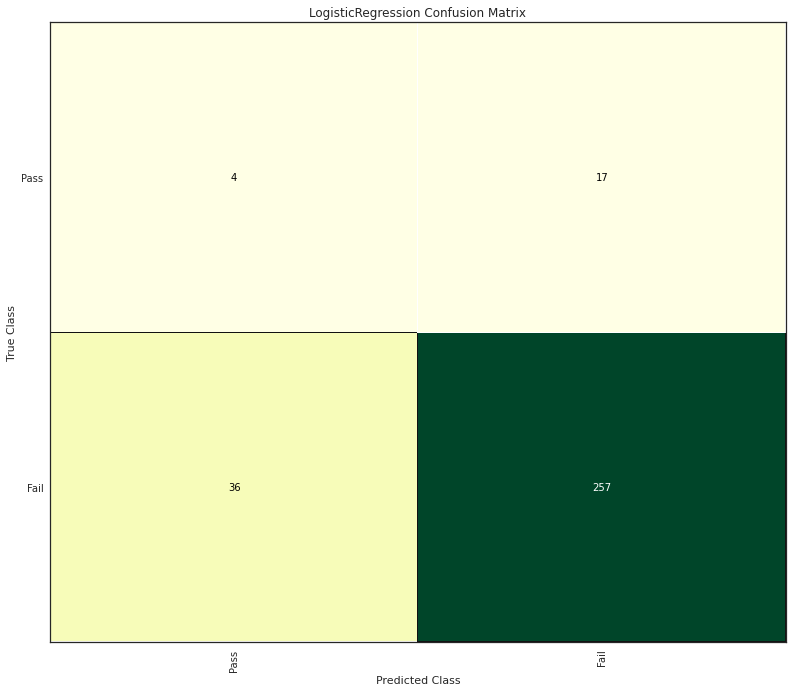

F1 Score: 0.8312101910828026
 MCC Score: 0.05065759831945425


In [355]:
f1score, mccscore = evaluate(train_df = X_train_imp, test_df = X_test_imp, train_target=y_train, test_target=y_test )
print(f'F1 Score: {f1score}\n MCC Score: {mccscore}')

#Normalization

In [356]:
normalizer = Normalizer()
normalizer.fit(X_train_imp)

Normalizer()

In [357]:
X_train_nrm = pd.DataFrame(normalizer.transform(X_train_imp), columns = X_train_imp.columns)
X_test_nrm = pd.DataFrame(normalizer.transform(X_test_imp), columns = X_test_imp.columns)

#Variance

In [358]:
df = pd.cut(data.var().round(2),[-0.1,0,0.1,0.2,1,10,50,100,500,1000,float('inf')]).value_counts().sort_index()
df.index = df.index.map(str)

fig = px.bar(color_discrete_sequence = ['green']*len(df),width = 600, height = 450, x=df.index, y=df,title="variance (rounded off to 2 decimal places) vs number of features (data: signal)", text = df)
fig.update_xaxes(title='variance intervals')
fig.update_yaxes(title='Number of features')
fig.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



In [359]:
vr = VarianceThreshold()
vr.fit(X_train_nrm)

VarianceThreshold()

In [360]:
mask = vr.get_support()
columns = X_train_nrm.columns
selected_cols = columns[mask]
n_features2 = len(selected_cols)
print(f'remaining features: {n_features2}')

remaining features: 446


In [361]:
X_train_var = pd.DataFrame(vr.transform(X_train_imp), columns = selected_cols)
X_test_var = pd.DataFrame(vr.transform(X_test_imp), columns = selected_cols)

/usr/local/lib/python3.7/dist-packages/yellowbrick/classifier/base.py:234: YellowbrickWarning:

could not determine class_counts_ from previously fitted classifier



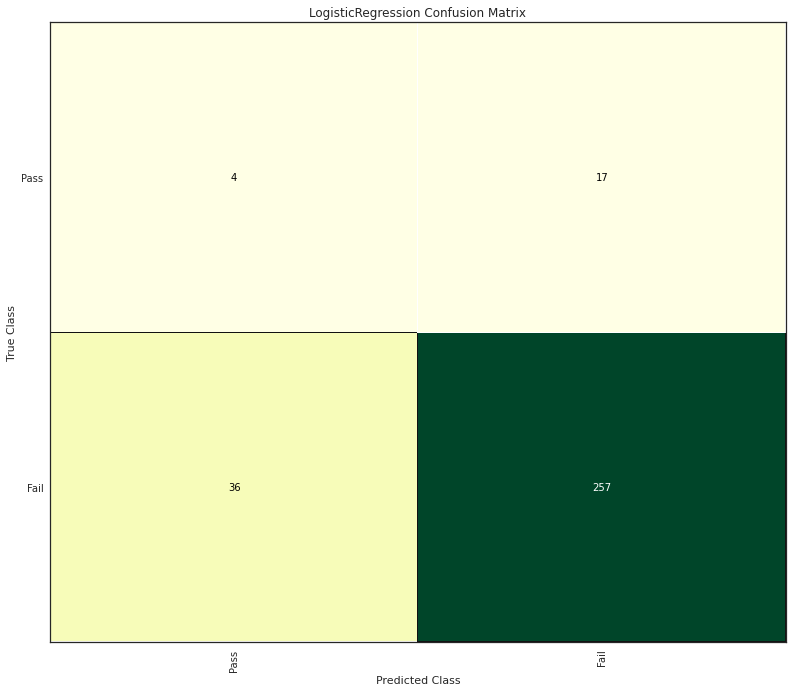

F1 Score: 0.8312101910828026
 MCC Score: 0.05065759831945425


In [362]:
f1score, mccscore = evaluate(train_df = X_train_var, test_df = X_test_var, train_target=y_train, test_target=y_test )
print(f'F1 Score: {f1score}\n MCC Score: {mccscore}')

#Correlation

In [363]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [364]:
corr_features = correlation(X_train_var, 0.95)
X_train_corr = X_train_var.drop(corr_features, axis=1)
X_test_corr = X_test_var.drop(corr_features, axis=1)
n_features3 = X_train_corr.shape[1]
print(f'Removed = {len(corr_features)}, Left = {n_features3}')

Removed = 177, Left = 269


/usr/local/lib/python3.7/dist-packages/yellowbrick/classifier/base.py:234: YellowbrickWarning:

could not determine class_counts_ from previously fitted classifier



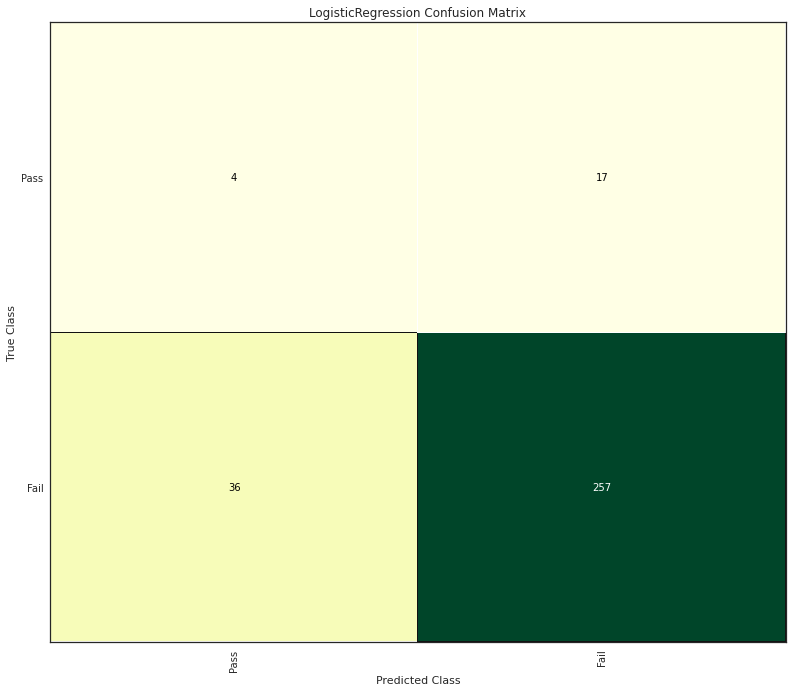

F1 Score: 0.8312101910828026
 MCC Score: 0.05065759831945425


In [365]:
f1score, mccscore = evaluate(train_df = X_train_corr, test_df = X_test_corr, train_target=y_train, test_target=y_test )
print(f'F1 Score: {f1score}\n MCC Score: {mccscore}')

In [366]:
def corrwith_target(dataframe, target, threshold):
    cor = dataframe.corr()
    #Correlation with output variable
    cor_target = abs(cor[target])
    #Selecting non correlated features
    relevant_features = cor_target[cor_target<threshold]
    return relevant_features.index.tolist()[:-1]

In [367]:
dummy_train = X_train_corr.copy()
dummy_train['target'] = y_train


In [368]:
corrwith_cols = corrwith_target(dummy_train, 'target', 0.05)
X_train_corw = X_train_corr.drop(corrwith_cols, axis=1)
X_test_corw = X_test_corr.drop(corrwith_cols, axis=1)
n_features4 = X_train_corw.shape[1]
print(f'Removed = {len(corrwith_cols)}, Left = {n_features4}')

Removed = 228, Left = 41


/usr/local/lib/python3.7/dist-packages/yellowbrick/classifier/base.py:234: YellowbrickWarning:

could not determine class_counts_ from previously fitted classifier



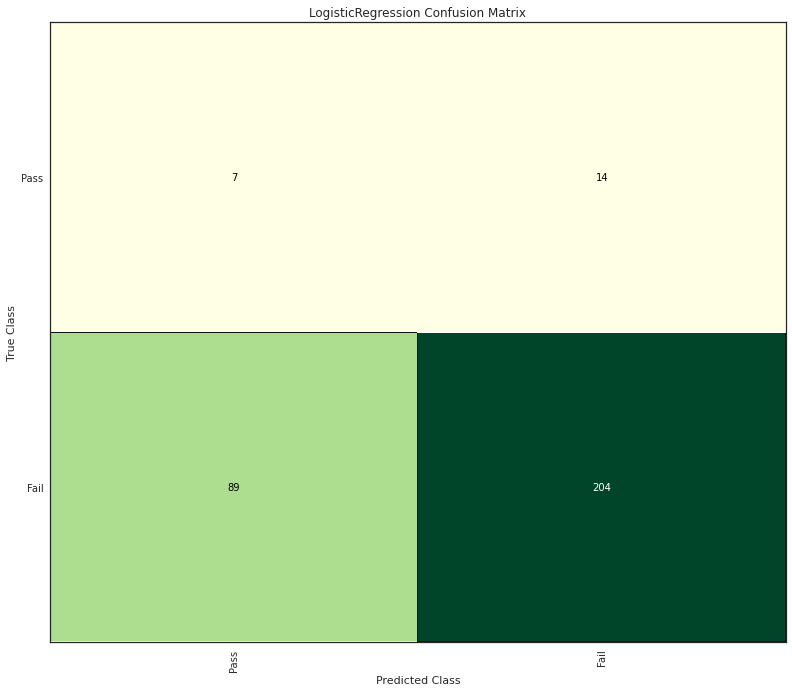

F1 Score: 0.6719745222929936
 MCC Score: 0.016038511767519862


In [369]:
f1score, mccscore = evaluate(train_df = X_train_corw, test_df = X_test_corw, train_target=y_train, test_target=y_test )
print(f'F1 Score: {f1score}\n MCC Score: {mccscore}')

#Outlier Analysis

In [370]:
def IQR_outliers(data,limit=1.5):
    numColumns = data.select_dtypes(include=np.number).columns.tolist();
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3-Q1;
    outliers=((data[numColumns] < (Q1 - limit*IQR)) | (data[numColumns] > (Q3 + limit*IQR))).sum()*100/data.shape[0]
    return outliers

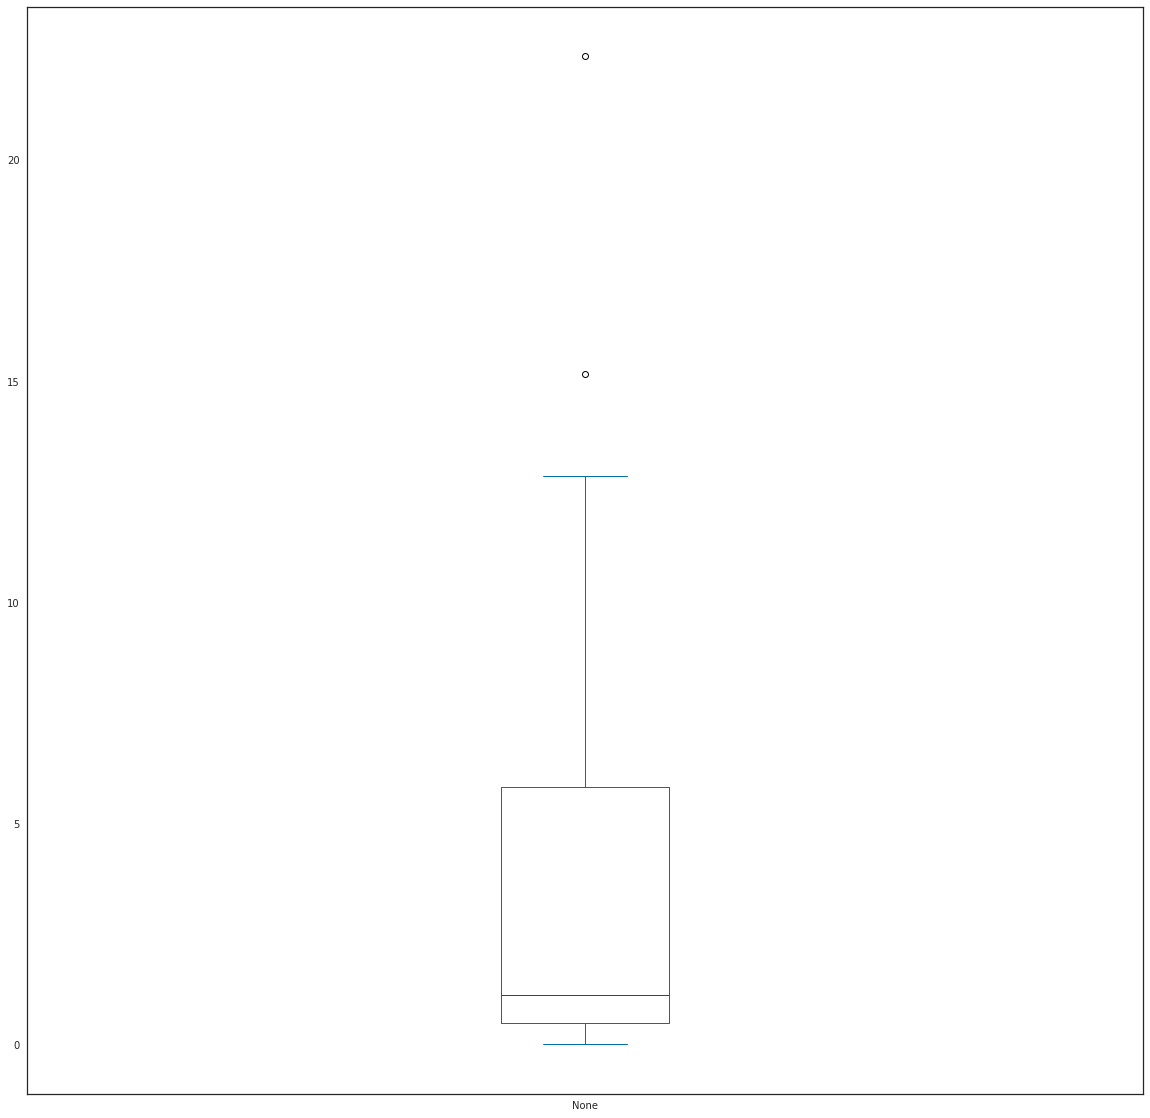

In [371]:
fig3 = plt.figure("Figure 3")
outliers_train = IQR_outliers(X_train_corw)
outliers_train.plot(kind = 'box')
plt.show()

In [372]:
import plotly.graph_objs as go
from plotly.offline import iplot
outliers = IQR_outliers(X_train_corw)
trace1 = go.Scatter(x=outliers.index, y=outliers,mode='markers',
                    name='Outliers Before transformation')
data = [trace1]
layout = go.Layout(xaxis = dict(title= 'Features'),
                   yaxis = dict(title= 'Percentage of IQR outliers'))
fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [373]:
import random 
from sklearn.preprocessing import QuantileTransformer
quantile_transformer = QuantileTransformer(output_distribution='normal', random_state=42)
df1 = pd.DataFrame(quantile_transformer.fit_transform(X_train_corw),columns=X_train_corw.columns)
outliers = IQR_outliers(X_train_corw)
outliers1=IQR_outliers(df1)

In [374]:
fig1 = go.Figure()
fig1.add_trace(go.Scatter(x=outliers.index, y=outliers,mode='markers',name='Outliers before transformation'))
fig1.add_trace(go.Scatter(x=outliers1.index, y=outliers1,mode='markers',name='Outliers after transformation'))
fig1.layout = dict(xaxis= dict(title= 'features'), yaxis= dict(title= 'percentage of IQR outliers'))
iplot(fig1)